# Sandpiles & Stock Markets

### Description

The Abeilan / Bak-Tang-Wiesenfeld Sandpile Simulation was first introduced by Per Bak, Chao Tang and Kurt Wiesenfeld in a 1987 paper, the sandpile simulation was the first discovered example of a dynamical system displaying self-organized criticality (SOC), which is a property of dynamical systems that have a critical point or state as a transitional event.




## Sandpile Simulations
Sandpile simulations are used to build up intuition about the behavior of complex systems — systems that have many components and a lot of unmodelled energy flow between them. In the first part of this post, the basic Abeilan Sandpile simulation will be illustrated, with graphs plotting features of avalanche events (events where sand particles are toppled, affecting the states of the surrounding area). After that, the sandpile will be extended to model stock markets — as they both exhibit similar dynamics.

### Abeilan / Bak-Tang-Wiesenfeld Sandpile Simulation

In [2]:
from   random  import randrange
import numpy   as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn') # styling matplotlib plots

def plot(data):
    values = [0,1,2,3]
    plt.figure(figsize=(15,4))
    im = plt.imshow(data, interpolation='none')
    colors = [ im.cmap(im.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label="Level {l}".format(l=values[i]) ) for i in range(len(values)) ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            plt.text(x  , y  , '%.0f' % data[y, x],horizontalalignment='center',verticalalignment='center', )
    plt.grid(True)
    plt.show()



In [3]:
############ Toppling rules ############

def check_threshold(sandpile,i,j, threshold,s,l,a,r):
    
    if not (i > sandpile.shape[0] or  j > sandpile.shape[1] or i <0 or j <0) and sandpile[i,j] >= threshold:
        s,l,a,r = toppling(sandpile,i,j,threshold,s,l,a,r)
    
    lifetime = l
    area = np.sum(a)
    radius = r
    size = s
    
    return size,lifetime,area,radius


def toppling(sandpile,i,j,threshold,s,l,a,r):
    # (1) z(i, j, t) = z(i, j, t) -  4
    sandpile[i,j] = sandpile[i,j]  -  threshold
    a[i,j] = 1
    s += threshold
    
    # (2) z(i ± 1, j, t) = z(i ± 1, j, t) + 1
    if i + 1 <= sandpile.shape[0]-1:
        sandpile[i + 1,j] += 1
        check_threshold(sandpile,i + 1,j,threshold,s,l,a,r)
        s += 1
        
    if i - 1 >= 0:
        sandpile[i - 1,j] += 1
        check_threshold(sandpile,i - 1,j,threshold,s,l,a,r)
        s += 1

    # (3) z(i, j ± 1, t) = z(i, j ± 1, t) + 1
    if j + 1 <= sandpile.shape[1]-1:
        sandpile[i ,j + 1] += 1
        check_threshold(sandpile,i,j + 1,threshold,s,l,a,r)
        s += 1
        
    if j - 1 >= 0:
        sandpile[i ,j - 1] += 1
        check_threshold(sandpile,i,j - 1,threshold,s,l,a,r)
        s += 1
    return s,l,a,r
        
############ Toppling rules ############



In [6]:

def BTWsandpile(M,N,show_step,time = 20,threshold=4):
    
    avalanche_mass = [] # how many sand particles on the table at this point time
    avalanche_size = [] # how many sand particles moved by the avalanche
    avalanche_lifetime = [] # how many timesteps it takes for an avalanche to relax the system to a critical state.
    avalanche_radius = [] 
    avalanche_area = []
    
    # (1) -  initializes an M by N grid
    sandpile = np.zeros((M,N), dtype=int)

    # (2) -  time
    for t in range(time-1):
        M_index = randrange(0,M)
        N_index = randrange(0,N)
        sandpile[M_index,N_index] += 1
        
        # (3) - toppling
        s, l,a,r  = check_threshold(sandpile,M_index,N_index,threshold,0,0,np.zeros((M,N), dtype=int),0)

        # plotting each step
        if not show_step:
            plot(sandpile)
            
        # calculating mass at time step
        avalanche_mass.append(sandpile.sum())
        avalanche_size.append(s)
        avalanche_lifetime.append(l)
        avalanche_radius.append(r)
        avalanche_area.append(a)
        
        
         
    print('The sandpile after',time,'time steps:')
    print(sandpile)
    plt.imshow(sandpile, cmap='hot', interpolation='nearest')
    plt.show()
    plt.clf()
    plt.plot(range(1,time),avalanche_mass)
    plt.ylabel(' Mass')
    plt.title('Avalanche Mass Accumelation through Time')
    plt.show()
    plt.clf()
    plt.loglog(range(1,time),avalanche_mass)
    plt.ylabel('Mass')
    plt.title('Avalanche Mass Accumelation through Time - Log Log Plot')
    plt.show()    
    plt.clf()
    f, ((size, lifetime), (radius, area)) = plt.subplots(2, 2, sharex='col', sharey='row')
    f.suptitle('By Time')
    size.plot(range(1,time), avalanche_size)
    size.set_title('Avalanche Size')
    lifetime.scatter(range(1,time),avalanche_lifetime)
    lifetime.set_title('Avalanche Lifetime')
    radius.scatter(range(1,time),avalanche_radius, color='r')
    radius.set_title('Avalanche Radius')
    area.plot(range(1,time),avalanche_area, color='r')
    area.set_title('Avalanche Area')
    plt.show()
    plt.clf()
    
    

The sandpile after 3000 time steps:
[[2 0 3 2 2 0 3 1 3]
 [1 3 3 1 2 3 3 2 3]
 [3 0 3 3 1 1 2 3 3]
 [3 1 2 1 3 1 2 2 3]
 [2 2 2 3 3 3 3 0 3]
 [2 3 2 2 1 3 3 3 2]
 [2 3 2 2 1 3 0 2 1]
 [1 1 2 2 1 2 3 3 2]
 [3 3 3 1 3 3 2 1 2]]


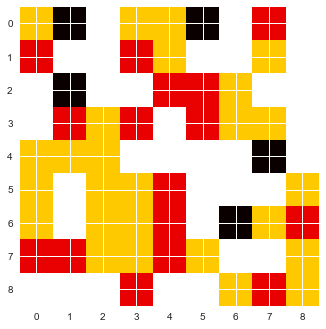

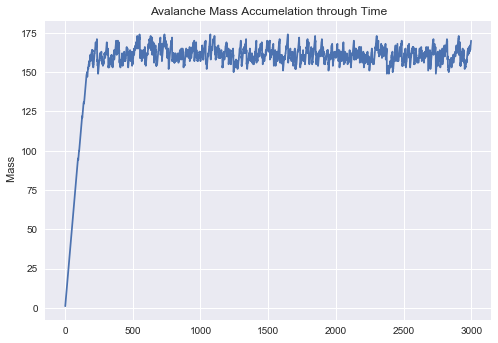

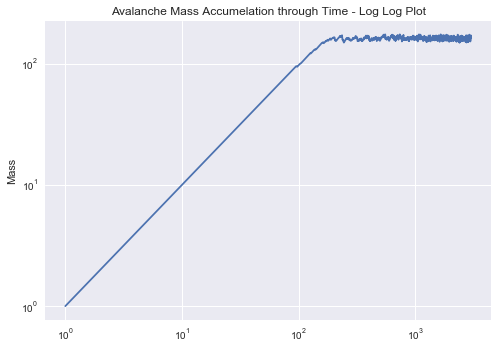

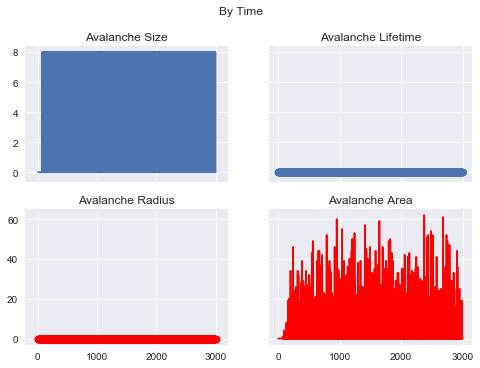

In [7]:
### Change parameters here

M = 9                # table length
N = 9                # table width
time = 3000           # time of simulations
threshold = 4        # threshold of toppling condition 
show_step = 'false'  # show sandpile by step

BTWsandpile(M,N,show_step,time,threshold)
